# Using data augmentation for increasing accuracy of our CNN model 

In [44]:
import numpy as np
import cv2
import tensorflow as tf
import PIL
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Loading flower dataset 

In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)  # '.'--> current directory
#'cache_dir'--> place where to store the loaded file. 'untar'--> since our file is a zip file, so to unzip we use this.

228813984/228813984 [==============================] - 153s 1us/step


In [8]:
import pathlib           #will be helpful in performing operations(we'll covert image into numpy array) related to photos paths.
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [10]:
list(data_dir.glob('*/*.jpg'))[:3]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg')]

In [11]:
len(list(data_dir.glob('*/*.jpg')))    #total photos count

3670

In [13]:
Daisy = list(data_dir.glob('Daisy/*'))

len(list(data_dir.glob('Daisy/*')))    #Daisy flower photos count

633

In [21]:
from PIL import Image
flower = PIL.Image.open(str(Daisy[1]))    # original size of flower is (500, 313)
flower = flower.resize((100,100),Image.ANTIALIAS)

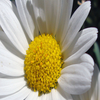

In [22]:
flower

## Converting flower images into numpy array

In [25]:
flower_dict = {
    'daisy' : list(data_dir.glob('Daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'roses' : list(data_dir.glob('roses/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [26]:
flower_labels = {
    'daisy' : 0,
    'dandelion' : 1,
    'roses' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [27]:
flower_dict['daisy'][:3]

[WindowsPath('datasets/flower_photos/Daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/Daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/Daisy/10172379554_b296050f82_n.jpg')]

In [30]:
str(flower_dict['daisy'][:3])

"[WindowsPath('datasets/flower_photos/Daisy/100080576_f52e8ee070_n.jpg'), WindowsPath('datasets/flower_photos/Daisy/10140303196_b88d3d6cec.jpg'), WindowsPath('datasets/flower_photos/Daisy/10172379554_b296050f82_n.jpg')]"

In [32]:
img = cv2.imread(str(flower_dict['roses'][0]))
img.shape

(240, 179, 3)

In [48]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [51]:
X, y = [],[]

for flower_name, images in flower_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_labels[flower_name])

In [52]:
X = np.array(X)
y = np.array(y)

## Splitting data

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
X_train[0] #Scaling required

array([[[ 92, 148, 183],
        [ 87, 148, 183],
        [ 82, 150, 185],
        ...,
        [ 30,  62,  76],
        [ 28,  62,  77],
        [ 32,  66,  81]],

       [[ 90, 146, 181],
        [ 85, 146, 181],
        [ 81, 147, 184],
        ...,
        [ 30,  62,  75],
        [ 27,  61,  76],
        [ 29,  63,  78]],

       [[ 87, 143, 178],
        [ 82, 142, 179],
        [ 79, 144, 183],
        ...,
        [ 29,  63,  76],
        [ 29,  62,  76],
        [ 29,  63,  78]],

       ...,

       [[ 31,  66,  72],
        [ 30,  66,  72],
        [ 30,  68,  73],
        ...,
        [ 25,  59,  59],
        [ 25,  57,  61],
        [ 27,  59,  64]],

       [[ 31,  67,  73],
        [ 31,  68,  73],
        [ 30,  68,  73],
        ...,
        [ 27,  61,  62],
        [ 27,  60,  64],
        [ 29,  61,  67]],

       [[ 32,  69,  75],
        [ 31,  69,  74],
        [ 31,  69,  74],
        ...,
        [ 29,  62,  63],
        [ 28,  60,  65],
        [ 29,  60,  68]]

In [63]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

## Building Convolutional Network

In [64]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
81/81 [==============================] - 36s 402ms/step - loss: 1.3545 - accuracy: 0.4130
Epoch 2/20
81/81 [==============================] - 31s 384ms/step - loss: 0.9812 - accuracy: 0.6189
Epoch 3/20
81/81 [==============================] - 30s 373ms/step - loss: 0.8096 - accuracy: 0.6870
Epoch 4/20
81/81 [==============================] - 30s 373ms/step - loss: 0.5977 - accuracy: 0.7688
Epoch 5/20
81/81 [==============================] - 31s 377ms/step - loss: 0.4393 - accuracy: 0.8369
Epoch 6/20
81/81 [==============================] - 30s 376ms/step - loss: 0.2461 - accuracy: 0.9175
Epoch 7/20
81/81 [==============================] - 30s 374ms/step - loss: 0.1566 - accuracy: 0.9459
Epoch 8/20
81/81 [==============================] - 31s 379ms/step - loss: 0.0713 - accuracy: 0.9829
Epoch 9/20
81/81 [==============================] - 31s 380ms/step - loss: 0.0406 - accuracy: 0.9899
Epoch 10/20
81/81 [==============================] - 30s 376ms/step - loss: 0.0175 - accura

In [65]:
model.evaluate(X_test_scaled, y_test)

35/35 [==============================] - 4s 103ms/step - loss: 2.7742 - accuracy: 0.6440


[2.774249315261841, 0.6439600586891174]

#### accuracy on training dataset is almost 100% and in test data 64%, data is overfitted on our model

In [66]:
predictions = model.predict(X_test_scaled)

35/35 [==============================] - 4s 105ms/step


In [69]:
score = tf.nn.softmax(predictions[1])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9.9990237e-01, 5.5683042e-05, 4.1782743e-05, 4.7174240e-16,
       6.8041800e-08], dtype=float32)>

In [70]:
np.argmax(score) #daisy

0

In [72]:
y_test[1]

0

## Using Data augmentation for improving test score

In [74]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

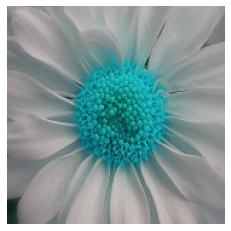

In [75]:
plt.axis('off')
plt.imshow(X[0])  #Original image

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy()) #showing some error

In [79]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
81/81 [==============================] - 41s 446ms/step - loss: 1.2657 - accuracy: 0.4737
Epoch 2/20
81/81 [==============================] - 38s 466ms/step - loss: 1.0494 - accuracy: 0.5866
Epoch 3/20
81/81 [==============================] - 38s 466ms/step - loss: 0.9576 - accuracy: 0.6220
Epoch 4/20
81/81 [==============================] - 37s 454ms/step - loss: 0.8662 - accuracy: 0.6598
Epoch 5/20
81/81 [==============================] - 39s 479ms/step - loss: 0.7979 - accuracy: 0.6800
Epoch 6/20
81/81 [==============================] - 38s 467ms/step - loss: 0.7325 - accuracy: 0.7205
Epoch 7/20
81/81 [==============================] - 40s 494ms/step - loss: 0.6907 - accuracy: 0.7357
Epoch 8/20
81/81 [==============================] - 38s 473ms/step - loss: 0.6723 - accuracy: 0.7423
Epoch 9/20
81/81 [==============================] - 44s 538ms/step - loss: 0.6222 - accuracy: 0.7571
Epoch 10/20
81/81 [==============================] - 39s 482ms/step - loss: 0.5489 - accura

In [81]:
model.evaluate(X_test_scaled, y_test)

35/35 [==============================] - 4s 102ms/step - loss: 0.9754 - accuracy: 0.7112


[0.9753643870353699, 0.7111716866493225]

### accuracy improved